In [1]:
import pandas as pd

# This link points to the CSV file stored in my GitHub repository.
csv_url = "https://raw.githubusercontent.com/Madhusudhansingh/real-time-industry-insight-sprint1/refs/heads/main/data/headlines_sample.csv?token=GHSAT0AAAAAADORXLEHQM3UX5XAMHJFK6PY2IQXSOA"

# Read the CSV file into a DataFrame
headlines_df = pd.read_csv(csv_url)

# Display the data to make sure everything loaded correctly
headlines_df


,title
0,TCS wins digital banking deal
1,Analysts flag concerns over margins at TCS
2,TCS announces partnership on AI research
3,TCS quarterly revenue beats estimates
4,TCS expands hiring across India


In [10]:
!pip install transformers --quiet


In [7]:
import pandas as pd

# --- Load data for all 3 companies ---

infosys_url = "https://raw.githubusercontent.com/Madhusudhansingh/real-time-industry-insight-sprint1/main/data/infosys_headlines.csv"
reliance_url = "https://raw.githubusercontent.com/Madhusudhansingh/real-time-industry-insight-sprint1/main/data/reliance_headlines.csv"
tcs_url = "https://raw.githubusercontent.com/Madhusudhansingh/real-time-industry-insight-sprint1/main/data/headlines_sample.csv"

infosys_df = pd.read_csv(infosys_url)
reliance_df = pd.read_csv(reliance_url)
tcs_df = pd.read_csv(tcs_url)

# Display first few rows from each company
infosys_df, reliance_df, tcs_df


(                                               title
 0  Infosys signs multi-year digital transformatio...
 1  Infosys launches new AI-powered automation pla...
 2  Infosys reports steady growth in quarterly ear...
 3  Infosys expands delivery center operations in ...
 4  Infosys strengthens cloud partnership with a m...,
                                                title
 0  Reliance Industries announces progress in gree...
 1  Reliance Retail expands footprint across major...
 2  Reliance Industries posts strong quarterly fin...
 3  Reliance Jio records highest subscriber growth...
 4  Reliance increases investment in large-scale r...,
                                         title
 0               TCS wins digital banking deal
 1  Analysts flag concerns over margins at TCS
 2    TCS announces partnership on AI research
 3       TCS quarterly revenue beats estimates
 4             TCS expands hiring across India)

In [11]:
from transformers import pipeline
import pandas as pd
from pathlib import Path

# make sure outputs folder exists
Path("/content/outputs").mkdir(parents=True, exist_ok=True)
Path("/content/data").mkdir(parents=True, exist_ok=True)

clf = pipeline("sentiment-analysis")

def analyze(df, company):
    preds = clf(df["title"].tolist())
    out = df.copy()
    out["company"] = company
    out["label"]   = [p["label"] for p in preds]
    out["score"]   = [float(p["score"]) for p in preds]
    out["signed_score"] = out.apply(
        lambda r: r["score"] if r["label"]=="POSITIVE" else -r["score"],
        axis=1
    )
    return out[["company","title","label","score","signed_score"]]

results = pd.concat([
    analyze(infosys_df,  "Infosys"),
    analyze(reliance_df, "Reliance Industries"),
    analyze(tcs_df,      "TCS")
], ignore_index=True)

results.to_csv("/content/data/sentiment_results.csv", index=False)
print("Saved -> /content/data/sentiment_results.csv")
results.head(10)


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


Saved -> /content/data/sentiment_results.csv


,company,title,label,score,signed_score
0,Infosys,Infosys signs multi-year digital transformatio...,POSITIVE,0.994465,0.994465
1,Infosys,Infosys launches new AI-powered automation pla...,POSITIVE,0.994959,0.994959
2,Infosys,Infosys reports steady growth in quarterly ear...,POSITIVE,0.999658,0.999658
3,Infosys,Infosys expands delivery center operations in ...,POSITIVE,0.999089,0.999089
4,Infosys,Infosys strengthens cloud partnership with a m...,POSITIVE,0.999509,0.999509
5,Reliance Industries,Reliance Industries announces progress in gree...,POSITIVE,0.999235,0.999235
6,Reliance Industries,Reliance Retail expands footprint across major...,POSITIVE,0.998750,0.998750
7,Reliance Industries,Reliance Industries posts strong quarterly fin...,POSITIVE,0.997020,0.997020
8,Reliance Industries,Reliance Jio records highest subscriber growth...,POSITIVE,0.996074,0.996074
9,Reliance Industries,Reliance increases investment in large-scale r...,POSITIVE,0.998344,0.998344


from matplotlib import pyplot as plt
_df_8['score'].plot(kind='hist', bins=20, title='score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9['signed_score'].plot(kind='hist', bins=20, title='signed_score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_10.groupby('company').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_11.plot(kind='scatter', x='score', y='signed_score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_12['score'].plot(kind='line', figsize=(8, 4), title='score')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['signed_score'].plot(kind='line', figsize=(8, 4), title='signed_score')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_14['company'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_14, x='score', y='company', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_15['company'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_15, x='signed_score', y='company', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [12]:
print("INFO: sizes of each DataFrame")
print("Infosys  :", len(infosys_df))
print("Reliance :", len(reliance_df))
print("TCS      :", len(tcs_df))

print("\nTCS preview:")
print(tcs_df.head())

INFO: sizes of each DataFrame
Infosys  : 5
Reliance : 5
TCS      : 5

TCS preview:
                                        title
0               TCS wins digital banking deal
1  Analysts flag concerns over margins at TCS
2    TCS announces partnership on AI research
3       TCS quarterly revenue beats estimates
4             TCS expands hiring across India


In [13]:
from transformers import pipeline
import pandas as pd

# 1) fresh analyzer
clf = pipeline("sentiment-analysis")

# 2) function
def analyze(df, company):
    preds = clf(df["title"].tolist())
    out = df.copy()
    out["company"] = company
    out["label"]   = [p["label"] for p in preds]
    out["score"]   = [float(p["score"]) for p in preds]
    out["signed_score"] = out.apply(
        lambda r: r["score"] if r["label"]=="POSITIVE" else -r["score"], axis=1
    )
    return out[["company","title","label","score","signed_score"]]

# 3) combine ALL THREE
results = pd.concat([
    analyze(infosys_df,  "Infosys"),
    analyze(reliance_df, "Reliance Industries"),
    analyze(tcs_df,      "TCS"),
], ignore_index=True)

# 4) show totals, not just head(10)
print("Row counts per company:")
print(results["company"].value_counts())
print("\nTOTAL rows:", len(results))

# 5) quick look at the LAST rows so TCS must appear
results.tail(6)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


Row counts per company:
company
Infosys                5
Reliance Industries    5
TCS                    5
Name: count, dtype: int64

TOTAL rows: 15


,company,title,label,score,signed_score
9,Reliance Industries,Reliance increases investment in large-scale r...,POSITIVE,0.998344,0.998344
10,TCS,TCS wins digital banking deal,POSITIVE,0.999701,0.999701
11,TCS,Analysts flag concerns over margins at TCS,NEGATIVE,0.966577,-0.966577
12,TCS,TCS announces partnership on AI research,POSITIVE,0.998990,0.998990
13,TCS,TCS quarterly revenue beats estimates,NEGATIVE,0.711375,-0.711375
14,TCS,TCS expands hiring across India,POSITIVE,0.998894,0.998894


In [14]:
results

,company,title,label,score,signed_score
0,Infosys,Infosys signs multi-year digital transformatio...,POSITIVE,0.994465,0.994465
1,Infosys,Infosys launches new AI-powered automation pla...,POSITIVE,0.994959,0.994959
2,Infosys,Infosys reports steady growth in quarterly ear...,POSITIVE,0.999658,0.999658
3,Infosys,Infosys expands delivery center operations in ...,POSITIVE,0.999089,0.999089
4,Infosys,Infosys strengthens cloud partnership with a m...,POSITIVE,0.999509,0.999509
5,Reliance Industries,Reliance Industries announces progress in gree...,POSITIVE,0.999235,0.999235
6,Reliance Industries,Reliance Retail expands footprint across major...,POSITIVE,0.998750,0.998750
7,Reliance Industries,Reliance Industries posts strong quarterly fin...,POSITIVE,0.997020,0.997020
8,Reliance Industries,Reliance Jio records highest subscriber growth...,POSITIVE,0.996074,0.996074
9,Reliance Industries,Reliance increases investment in large-scale r...,POSITIVE,0.998344,0.998344


<Figure size 1000x500 with 0 Axes>

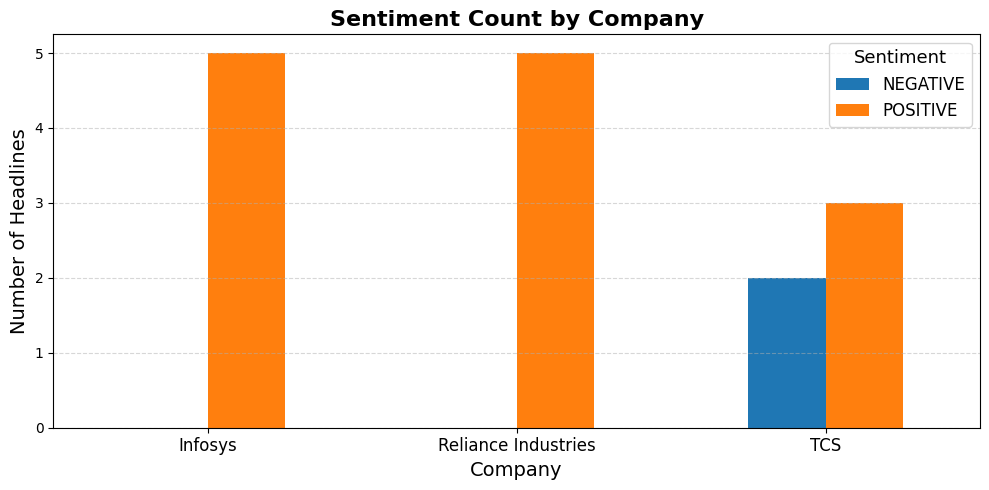

Saved -> /content/outputs/sentiment_counts_per_company_clean.png


In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Prepare data again
counts = pd.crosstab(results["company"], results["label"]).reindex(
    ["Infosys", "Reliance Industries", "TCS"]
)

# --- Improved visualization ---
plt.figure(figsize=(10,5))

# Plot
counts.plot(kind="bar", figsize=(10,5))

# Titles and labels
plt.title("Sentiment Count by Company", fontsize=16, fontweight='bold')
plt.xlabel("Company", fontsize=14)
plt.ylabel("Number of Headlines", fontsize=14)

# Improve x-axis readability
plt.xticks(rotation=0, fontsize=12)

# Improve legend
plt.legend(title="Sentiment", fontsize=12, title_fontsize=13)

# Add grid for clarity
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.savefig("/content/outputs/sentiment_counts_per_company_clean.png", dpi=160)
plt.show()

print("Saved -> /content/outputs/sentiment_counts_per_company_clean.png")


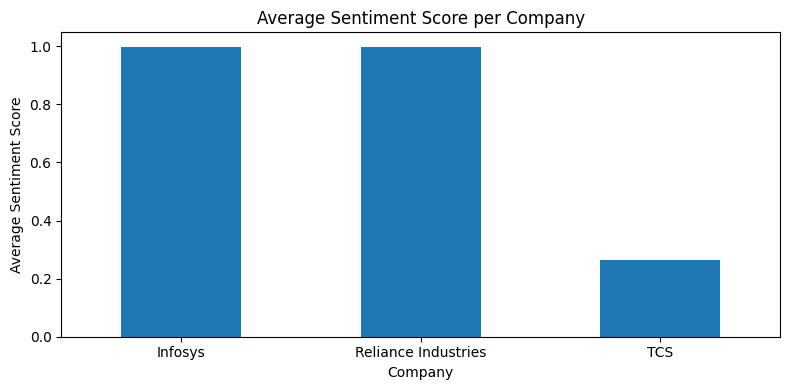

Saved -> /content/outputs/average_sentiment_score.png


In [19]:
import matplotlib.pyplot as plt

# --- Calculate average sentiment score per company ---
avg_scores = results.groupby("company")["signed_score"].mean()

# --- Plot ---
plt.figure(figsize=(8,4))
avg_scores.plot(kind="bar")

plt.title("Average Sentiment Score per Company")
plt.xlabel("Company")
plt.ylabel("Average Sentiment Score")
plt.xticks(rotation=0)

plt.tight_layout()

plt.savefig("/content/outputs/average_sentiment_score.png", dpi=140)
plt.show()

print("Saved -> /content/outputs/average_sentiment_score.png")
